<a href="https://colab.research.google.com/github/jithin-k-sreedharan/dataflowr/blob/master/PlutonAI/02_basics_PlutonAI_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 2: PyTorch tensors and automatic differentiation

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np

In [2]:
torch.__version__

'1.5.1+cu101'

<font color='red'>Tensor documentation: https://pytorch.org/docs/stable/tensors.html</font>

Tensors are used to encode the signal to process, but also the internal states and parameters of models.

**Manipulating data through this constrained structure allows to use CPUs and GPUs at peak performance.**

Construct a 3x5 matrix, uninitialized:

In [3]:
x = torch.empty(3,5)
print(x.dtype)
print(x)

torch.float32
tensor([[8.8474e-36, 0.0000e+00, 3.3631e-44, 0.0000e+00,        nan],
        [0.0000e+00, 1.1578e+27, 1.1362e+30, 7.1547e+22, 4.5828e+30],
        [1.2121e+04, 7.1846e+22, 9.2198e-39, 7.0374e+22, 0.0000e+00]])


If you got an error this [stackoverflow link](https://stackoverflow.com/questions/50617917/overflow-when-unpacking-long-pytorch) might be useful...

In [4]:
x = torch.randn(3,5)
print(x)

tensor([[ 0.0432,  0.3728,  0.7354,  0.0825,  1.7872],
        [ 0.4063,  0.0654, -0.2812, -0.0637,  2.0922],
        [ 1.0165, -0.7459, -0.1666,  0.7145,  1.2538]])


In [5]:
print(x.size())

torch.Size([3, 5])


torch.Size is in fact a [tuple](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences), so it supports the same operations.

In [6]:
x.size()[1]

5

In [7]:
x.size() == (3,5)

True

### Bridge to numpy

In [8]:
y = x.numpy()
print(y)

[[ 0.0431743   0.3727643   0.73536456  0.0825034   1.7872052 ]
 [ 0.40633428  0.0653878  -0.28120664 -0.06373765  2.0921786 ]
 [ 1.016481   -0.74586785 -0.1666218   0.71451706  1.253812  ]]


In [9]:
a = np.ones(5)
b = torch.from_numpy(a)
print(a.dtype)
print(b)

float64
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [10]:
c = b.long()
print(c.dtype, c)
print(b.dtype, b)

torch.int64 tensor([1, 1, 1, 1, 1])
torch.float64 tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [11]:
xr = torch.randn(3, 5)
print(xr.dtype, xr)

torch.float32 tensor([[ 0.7502,  0.4293, -0.4130,  0.0260, -0.7699],
        [ 1.0670, -0.0406, -0.2798, -0.1696,  1.3175],
        [ 1.2877,  0.2379,  0.9009, -0.5660, -0.2142]])


In [12]:
resb = xr + b
resb

tensor([[1.7502, 1.4293, 0.5870, 1.0260, 0.2301],
        [2.0670, 0.9594, 0.7202, 0.8304, 2.3175],
        [2.2877, 1.2379, 1.9009, 0.4340, 0.7858]], dtype=torch.float64)

In [13]:
resc = xr + c
resc

tensor([[1.7502, 1.4293, 0.5870, 1.0260, 0.2301],
        [2.0670, 0.9594, 0.7202, 0.8304, 2.3175],
        [2.2877, 1.2379, 1.9009, 0.4340, 0.7858]])

Be careful with types!

In [14]:
resb == resc

tensor([[False, False,  True, False,  True],
        [ True, False, False, False, False],
        [ True,  True, False,  True, False]])

In [15]:
torch.set_printoptions(precision=10)

In [16]:
resb[0,1]

tensor(1.4292806089, dtype=torch.float64)

In [17]:
resc[0,1]

tensor(1.4292806387)

In [18]:
resc[0,1].dtype

torch.float32

In [19]:
xr[0,1]

tensor(0.4292806089)

In [20]:
torch.set_printoptions(precision=4)

### [Broadcasting](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html)

Broadcasting automagically expands dimensions by replicating coefficients, when it is necessary to perform operations.

1. If one of the tensors has fewer dimensions than the other, it is reshaped by adding as many dimensions of size 1 as necessary in the front; then
2. for every mismatch, if one of the two tensor is of size one, it is expanded along this axis by replicating  coefficients.

If there is a tensor size mismatch for one of the dimension and neither of them is one, the operation fails.

In [21]:
A = torch.tensor([[1.], [2.], [3.], [4.]])
print(A.size())
B = torch.tensor([[5., -5., 5., -5., 5.]])
print(B.size())
C = A + B

torch.Size([4, 1])
torch.Size([1, 5])


In [22]:
C

tensor([[ 6., -4.,  6., -4.,  6.],
        [ 7., -3.,  7., -3.,  7.],
        [ 8., -2.,  8., -2.,  8.],
        [ 9., -1.,  9., -1.,  9.]])

The original (column-)vector
\begin{eqnarray*}
A = \left( \begin{array}{c}
1\\
2\\
3\\
4\\
\end{array}\right)
\end{eqnarray*}
is transformed into the matrix 
\begin{eqnarray*}
A = \left( \begin{array}{ccccc}
1&1&1&1&1\\
2&2&2&2&2\\
3&3&3&3&3\\
4&4&4&4&4
\end{array}\right)
\end{eqnarray*}
and the original (row-)vector
\begin{eqnarray*}
B = (5,-5,5,-5,5)
\end{eqnarray*}
is transformed into the matrix
\begin{eqnarray*}
B = \left( \begin{array}{ccccc}
5&-5&5&-5&5\\
5&-5&5&-5&5\\
5&-5&5&-5&5\\
5&-5&5&-5&5
\end{array}\right)
\end{eqnarray*}
so that summing these matrices gives:
\begin{eqnarray*}
A+B = \left( \begin{array}{ccccc}
6&-4&6&-4&6\\
7&-3&7&-3&7\\
8&-2&8&-2&8\\
9&-1&9&-1&9
\end{array}\right)
\end{eqnarray*}

### In-place modification

In [23]:
x

tensor([[ 0.0432,  0.3728,  0.7354,  0.0825,  1.7872],
        [ 0.4063,  0.0654, -0.2812, -0.0637,  2.0922],
        [ 1.0165, -0.7459, -0.1666,  0.7145,  1.2538]])

In [24]:
xr

tensor([[ 0.7502,  0.4293, -0.4130,  0.0260, -0.7699],
        [ 1.0670, -0.0406, -0.2798, -0.1696,  1.3175],
        [ 1.2877,  0.2379,  0.9009, -0.5660, -0.2142]])

In [25]:
print(x+xr)

tensor([[ 0.7934,  0.8020,  0.3224,  0.1085,  1.0173],
        [ 1.4734,  0.0248, -0.5610, -0.2334,  3.4097],
        [ 2.3042, -0.5080,  0.7343,  0.1485,  1.0396]])


In [26]:
x.add_(xr)
print(x)

tensor([[ 0.7934,  0.8020,  0.3224,  0.1085,  1.0173],
        [ 1.4734,  0.0248, -0.5610, -0.2334,  3.4097],
        [ 2.3042, -0.5080,  0.7343,  0.1485,  1.0396]])


Any operation that mutates a tensor in-place is post-fixed with an ```_```

For example: ```x.fill_(y)```, ```x.t_()```, will change ```x```.

In [27]:
print(x.t())

tensor([[ 0.7934,  1.4734,  2.3042],
        [ 0.8020,  0.0248, -0.5080],
        [ 0.3224, -0.5610,  0.7343],
        [ 0.1085, -0.2334,  0.1485],
        [ 1.0173,  3.4097,  1.0396]])


In [28]:
x.t_()
print(x)

tensor([[ 0.7934,  1.4734,  2.3042],
        [ 0.8020,  0.0248, -0.5080],
        [ 0.3224, -0.5610,  0.7343],
        [ 0.1085, -0.2334,  0.1485],
        [ 1.0173,  3.4097,  1.0396]])


### Shared memory

Also be careful, changing the torch tensor modify the numpy array and vice-versa...

This is explained in the PyTorch documentation [here](https://pytorch.org/docs/stable/torch.html#torch.from_numpy):
The returned tensor by `torch.from_numpy` and ndarray share the same memory. Modifications to the tensor will be reflected in the ndarray and vice versa. 

In [29]:
a = np.ones(5)
b = torch.from_numpy(a)
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [30]:
a[2] = 0
print(b)

tensor([1., 1., 0., 1., 1.], dtype=torch.float64)


In [31]:
b[3] = 5
print(a)

[1. 1. 0. 5. 1.]


### Cuda

In [32]:
torch.cuda.is_available()

True

In [33]:
#device = torch.device('cpu')
device = torch.device('cuda') # Uncomment this to run on GPU

In [34]:
x.device

device(type='cpu')

In [35]:
x.dtype

torch.float32

In [38]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z,z.type())
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

tensor([[1.7934, 2.4734, 3.3042],
        [1.8020, 1.0248, 0.4920],
        [1.3224, 0.4390, 1.7343],
        [1.1085, 0.7666, 1.1485],
        [2.0173, 4.4097, 2.0396]], device='cuda:0') torch.cuda.FloatTensor
tensor([[1.7934, 2.4734, 3.3042],
        [1.8020, 1.0248, 0.4920],
        [1.3224, 0.4390, 1.7343],
        [1.1085, 0.7666, 1.1485],
        [2.0173, 4.4097, 2.0396]], dtype=torch.float64)


In [39]:
x = torch.randn(1)
x = x.to(device)

In [40]:
x.device

device(type='cuda', index=0)

In [41]:
# the following line is only useful if CUDA is available
x = x.data
print(x)
print(x.item())
print(x.cpu().numpy())

tensor([0.1118], device='cuda:0')
0.11181820183992386
[0.1118182]


# Simple interfaces to standard image data-bases

An example, the [CIFAR10](https://pytorch.org/docs/stable/torchvision/datasets.html#torchvision.datasets.CIFAR10) dataset.

In [42]:
import torchvision

data_dir = 'content/data'

cifar = torchvision.datasets.CIFAR10(data_dir, train = True, download = True)
cifar.data.shape

Extracting content/data/cifar-10-python.tar.gz to content/data


(50000, 32, 32, 3)

Documentation about the [`permute`](https://pytorch.org/docs/stable/tensors.html#torch.Tensor.permute) operation.

In [43]:
x = torch.from_numpy(cifar.data).permute(0,3,1,2).float()
x = x / 255
print(x.type(), x.size(), x.min().item(), x.max().item())

torch.FloatTensor torch.Size([50000, 3, 32, 32]) 0.0 1.0


Documentation about the [`narrow(input, dim, start, length)`](https://pytorch.org/docs/stable/torch.html#torch.narrow) operation.

In [44]:
# Narrows to the first images, converts to float
x = torch.narrow(x, 0, 0, 48)

In [45]:
x.shape

torch.Size([48, 3, 32, 32])

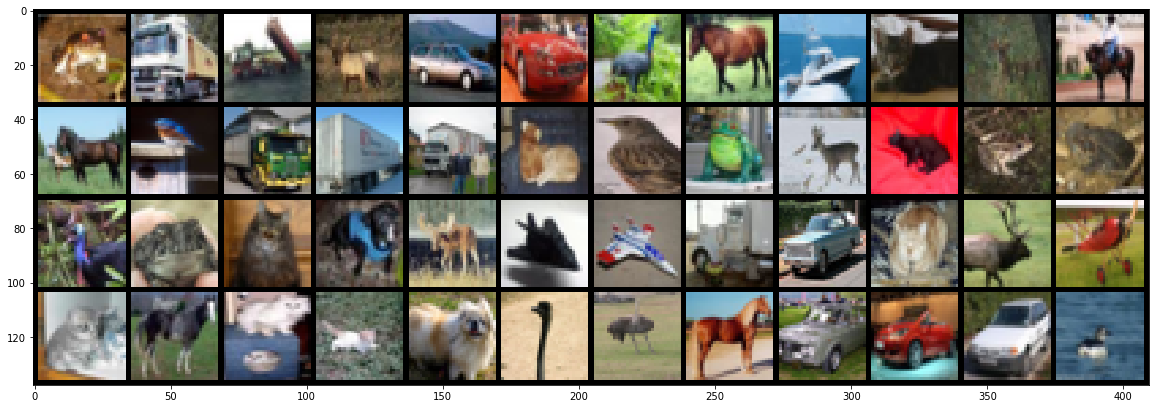

In [46]:
# Showing images
def show(img):
    npimg = img.numpy()
    plt.figure(figsize=(20,10))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    
show(torchvision.utils.make_grid(x, nrow = 12))

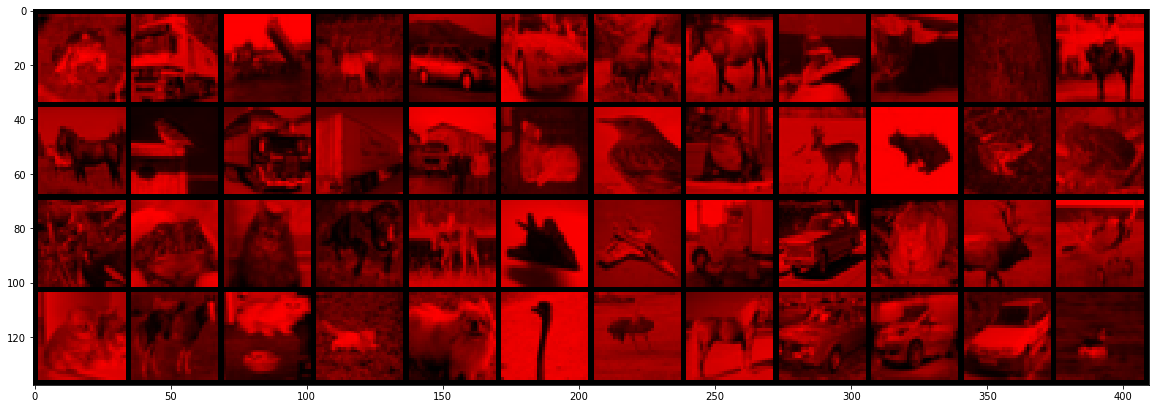

In [47]:
# Kills the green and blue channels
x.narrow(1, 1, 2).fill_(0)
show(torchvision.utils.make_grid(x, nrow = 12))

# Autograd: automatic differentiation

When executing tensor operations, PyTorch can automatically construct on-the-fly the graph of operations to compute the gradient of any quantity with respect to any tensor involved.

<font color='red'>Gradient of any quantity (means function?) w.r.t. any tensor? Can gradient even exist in all the cases</font>

To be more concrete, we introduce the following example: we consider parameters $w\in \mathbb{R}$ and $b\in \mathbb{R}$ with the corresponding function:
\begin{eqnarray*}
\ell = \left(\exp(wx+b) - y^* \right)^2
\end{eqnarray*}

Our goal here, will be to compute the following partial derivatives:
\begin{eqnarray*}
\frac{\partial \ell}{\partial w}\mbox{ and, }\frac{\partial \ell}{\partial b}.
\end{eqnarray*}

The reason for doing this will be clear when you will solve the practicals for this lesson!

You can decompose this function as a composition of basic operations. This is call the forward pass on the graph of operations.
![backprop1](https://mlelarge.github.io/dataflowr/PlutonAI/backprop1.png)

Let say we start with our model in `numpy`:

In [ ]:
w = np.array([0.5])
b = np.array([2])
xx = np.array([0.5])#np.arange(0,1.5,.5)

transform these into `tensor`:

In [ ]:
xx_t = torch.from_numpy(xx)
w_t = torch.from_numpy(w)
b_t = torch.from_numpy(b)

A `tensor` has a Boolean field `requires_grad`, set to `False` by default, which states if PyTorch should build the graph of operations so that gradients with respect to it can be computed.

In [ ]:
w_t.requires_grad

We want to take derivative with respect to $w$ so we change this value:

In [ ]:
w_t.requires_grad_(True)

We want to do the same thing for $b$ but the following line will produce an error!

In [ ]:
b_t.requires_grad_(True)

Reading the error message should allow you to correct the mistake!

In [ ]:
dtype = torch.float64

In [ ]:
b_t = b_t.type(dtype)

In [ ]:
b_t.requires_grad_(True)

We now compute the function:

In [ ]:
def fun(x,ystar):
    y = torch.exp(w_t*x+b_t)
    print(y)
    return torch.sum((y-ystar)**2)

ystar_t = torch.randn_like(xx_t)
l_t = fun(xx_t,ystar_t)

In [ ]:
l_t

In [ ]:
l_t.requires_grad

After the computation is finished, i.e. *forward pass*, you can call ```.backward()``` and have all the gradients computed automatically.

In [ ]:
print(w_t.grad)

In [ ]:
l_t.backward()

In [ ]:
print(w_t.grad)
print(b_t.grad)

Let's try to understand these numbers...

![backprop2](https://mlelarge.github.io/dataflowr/PlutonAI/backprop2.png)

In [ ]:
yy_t = torch.exp(w_t*xx_t+b_t)
print(torch.sum(2*(yy_t-ystar_t)*yy_t*xx_t))
print(torch.sum(2*(yy_t-ystar_t)*yy_t))

`tensor.backward()` accumulates the gradients in  the `grad` fields  of tensors.

In [ ]:
l_t = fun(xx_t,ystar_t)
l_t.backward()

In [ ]:
print(w_t.grad)
print(b_t.grad)

By default, `backward` deletes the computational graph when it is used so that you will get an error below:

In [ ]:
l_t.backward()

In [ ]:
# Manually zero the gradients
w_t.grad.data.zero_()
b_t.grad.data.zero_()
l_t = fun(xx_t,ystar_t)
l_t.backward(retain_graph=True)
l_t.backward()
print(w_t.grad)
print(b_t.grad)

The gradients must be set to zero manually. Otherwise they will cumulate across several _.backward()_ calls. 
This accumulating behavior is desirable in particular to compute the gradient of a loss summed over several “mini-batches,” or the gradient of a sum of losses.

# Playing with pytorch: linear regression

## Warm-up: Linear regression with numpy

Our model is:
$$
y_t = 2x^1_t-3x^2_t+1, \quad t\in\{1,\dots,30\}
$$

Our task is given the 'observations' $(x_t,y_t)_{t\in\{1,\dots,30\}}$ to recover the weights $w^1=2, w^2=-3$ and the bias $b = 1$.

In order to do so, we will solve the following optimization problem:
$$
\underset{w^1,w^2,b}{\operatorname{argmin}} \sum_{t=1}^{30} \left(w^1x^1_t+w^2x^2_t+b-y_t\right)^2
$$

In [ ]:
import numpy as np
from numpy.random import random
# generate random input data
x = random((30,2))

# generate labels corresponding to input data x
y = np.dot(x, [2., -3.]) + 1.
w_source = np.array([2., -3.])
b_source  = np.array([1.])

In [ ]:
x[:5]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def plot_figs(fig_num, elev, azim, x, y, weights, bias):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, elev=elev, azim=azim)
    ax.scatter(x[:, 0], x[:, 1], y)
    ax.plot_surface(np.array([[0, 0], [1, 1]]),
                    np.array([[0, 1], [0, 1]]),
                    (np.dot(np.array([[0, 0, 1, 1],
                                          [0, 1, 0, 1]]).T, weights) + bias).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')
    
def plot_views(x, y, w, b):
    #Generate the different figures from different views
    elev = 43.5
    azim = -110
    plot_figs(1, elev, azim, x, y, w, b[0])

    plt.show()

In [ ]:
plot_views(x, y, w_source, b_source)

In vector form, we define:
$$
\hat{y}_t = {\bf w}^T{\bf x}_t+b
$$
and we want to minimize the loss given by:
$$
loss = \sum_t\underbrace{\left(\hat{y}_t-y_t \right)^2}_{loss_t}.
$$

To minimize the loss we first compute the gradient of each $loss_t$:
\begin{eqnarray*}
\frac{\partial{loss_t}}{\partial w^1} &=& 2x^1_t\left({\bf w}^T{\bf x}_t+b-y_t \right)\\
\frac{\partial{loss_t}}{\partial w^2} &=& 2x^2_t\left({\bf w}^T{\bf x}_t+b-y_t \right)\\
\frac{\partial{loss_t}}{\partial b} &=& 2\left({\bf w}^T{\bf x}_t+b-y_t \right)
\end{eqnarray*}

Note that the actual gradient of the loss is given by:
$$
\frac{\partial{loss}}{\partial w^1} =\sum_t \frac{\partial{loss_t}}{\partial w^1},\quad
\frac{\partial{loss}}{\partial w^2} =\sum_t \frac{\partial{loss_t}}{\partial w^2},\quad
\frac{\partial{loss}}{\partial b} =\sum_t \frac{\partial{loss_t}}{\partial b}
$$

For one epoch, **(Batch) Gradient Descent** updates the weights and bias as follows:
\begin{eqnarray*}
w^1_{new}&=&w^1_{old}-\alpha\frac{\partial{loss}}{\partial w^1} \\
w^2_{new}&=&w^2_{old}-\alpha\frac{\partial{loss}}{\partial w^2} \\
b_{new}&=&b_{old}-\alpha\frac{\partial{loss}}{\partial b},
\end{eqnarray*}

and then we run several epochs.

In [ ]:
# randomly initialize learnable weights and bias
w_init = random(2)
b_init = random(1)

w = w_init
b = b_init
print("initial values of the parameters:", w, b )

In [ ]:
# our model forward pass
def forward(x):
    return x.dot(w)+b

# Loss function
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2 

print("initial loss:", np.sum([loss(x_val,y_val) for x_val, y_val in zip(x, y)]) )

# compute gradient
def gradient(x, y):  # d_loss/d_w, d_loss/d_c
    return 2*(x.dot(w)+b - y)*x, 2 * (x.dot(w)+b - y)
 
learning_rate = 1e-2
# Training loop
for epoch in range(10):
    grad_w = np.array([0,0])
    grad_b = np.array(0)
    l = 0
    for x_val, y_val in zip(x, y):
        grad_w = np.add(grad_w,gradient(x_val, y_val)[0])
        grad_b = np.add(grad_b,gradient(x_val, y_val)[1])
        l += loss(x_val, y_val)
    w = w - learning_rate * grad_w
    b = b - learning_rate * grad_b
    print("progress:", "epoch:", epoch, "loss",l[0])

# After training
print("estimation of the parameters:", w, b)

In [ ]:
plot_views(x, y, w, b)

## Linear regression with tensors

In [ ]:
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

In [ ]:
x_t = torch.from_numpy(x).type(dtype)
y_t = torch.from_numpy(y).type(dtype).unsqueeze(1)

This is an implementation of **(Batch) Gradient Descent** with tensors.

Note that in the main loop, the functions loss_t and gradient_t are always called with the same inputs: they can easily be incorporated into the loop (we'll do that below).

In [ ]:
w_init_t = torch.from_numpy(w_init).type(dtype)
b_init_t = torch.from_numpy(b_init).type(dtype)

w_t = w_init_t.clone()
w_t.unsqueeze_(1)
b_t = b_init_t.clone()
b_t.unsqueeze_(1)
print("initial values of the parameters:", w_t, b_t )

In [ ]:
# our model forward pass
def forward_t(x):
    return x.mm(w_t)+b_t

# Loss function
def loss_t(x, y):
    y_pred = forward_t(x)
    return (y_pred - y).pow(2).sum()

# compute gradient
def gradient_t(x, y):  # d_loss/d_w, d_loss/d_c
    return 2*torch.mm(torch.t(x),x.mm(w_t)+b_t - y), 2 * (x.mm(w_t)+b_t - y).sum()

learning_rate = 1e-2
for epoch in range(10):
    l_t = loss_t(x_t,y_t)
    grad_w, grad_b = gradient_t(x_t,y_t)
    w_t = w_t-learning_rate*grad_w
    b_t = b_t-learning_rate*grad_b
    print("progress:", "epoch:", epoch, "loss",l_t)

# After training
print("estimation of the parameters:", w_t, b_t )

## Linear regression with Autograd

In [ ]:
# Setting requires_grad=True indicates that we want to compute gradients with
# respect to these Tensors during the backward pass.
w_v = w_init_t.clone().unsqueeze(1)
w_v.requires_grad_(True)
b_v = b_init_t.clone().unsqueeze(1)
b_v.requires_grad_(True)
print("initial values of the parameters:", w_v.data, b_v.data )

An implementation of **(Batch) Gradient Descent** without computing explicitly the gradient and using autograd instead.

In [ ]:
for epoch in range(10):
    y_pred = x_t.mm(w_v)+b_v
    loss = (y_pred - y_t).pow(2).sum()
    
    # Use autograd to compute the backward pass. This call will compute the
    # gradient of loss with respect to all Variables with requires_grad=True.
    # After this call w.grad and b.grad will be tensors holding the gradient
    # of the loss with respect to w and b respectively.
    loss.backward()
    
    # Update weights using gradient descent. For this step we just want to mutate
    # the values of w_v and b_v in-place; we don't want to build up a computational
    # graph for the update steps, so we use the torch.no_grad() context manager
    # to prevent PyTorch from building a computational graph for the updates
    with torch.no_grad():
        w_v -= learning_rate * w_v.grad
        b_v -= learning_rate * b_v.grad
    
    # Manually zero the gradients after updating weights
    # otherwise gradients will be acumulated after each .backward()
    w_v.grad.zero_()
    b_v.grad.zero_()
    
    print("progress:", "epoch:", epoch, "loss",loss.data.item())

# After training
print("estimation of the parameters:", w_v.data, b_v.data.t() )

## Linear regression with neural network

An implementation of **(Batch) Gradient Descent** using the nn package. Here we have a super simple model with only one layer and no activation function!

In [ ]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. Each Linear Module computes output from input using a
# linear function, and holds internal Variables for its weight and bias.
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)

for m in model.children():
    m.weight.data = w_init_t.clone().unsqueeze(0)
    m.bias.data = b_init_t.clone()

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

# switch to train mode
model.train()

for epoch in range(10):
    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Variable of input data to the Module and it produces
    # a Variable of output data.
    y_pred = model(x_t)
  
    # Note this operation is equivalent to: pred = model.forward(x_v)

    # Compute and print loss. We pass Variables containing the predicted and true
    # values of y, and the loss function returns a Variable containing the
    # loss.
    loss = loss_fn(y_pred, y_t)

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Variables with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its data and gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param.data -= learning_rate * param.grad
        
    print("progress:", "epoch:", epoch, "loss",loss.data.item())

# After training
print("estimation of the parameters:")
for param in model.parameters():
    print(param)

Last step, we use directly the optim package to update the weights and bias.

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)

for m in model.children():
    m.weight.data = w_init_t.clone().unsqueeze(0)
    m.bias.data = b_init_t.clone()

loss_fn = torch.nn.MSELoss(reduction='sum')

model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for epoch in range(10):
    y_pred = model(x_t)
    loss = loss_fn(y_pred, y_t)
    print("progress:", "epoch:", epoch, "loss",loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
# After training
print("estimation of the parameters:")
for param in model.parameters():
    print(param)

## Remark

This problem can be solved in 3 lines of code!

In [ ]:
xb_t = torch.cat((x_t,torch.ones(30).unsqueeze(1)),1)
sol, _ =torch.lstsq(y_t,xb_t)
sol[:3]

## Exercise: Play with the code

Change the number of samples from 30 to 300. What happens? How to correct it?

In [ ]:
x = random((300,2))
y = np.dot(x, [2., -3.]) + 1.
x_t = torch.from_numpy(x).type(dtype)
y_t = torch.from_numpy(y).type(dtype).unsqueeze(1)

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(2, 1),
)

for m in model.children():
    m.weight.data = w_init_t.clone().unsqueeze(0)
    m.bias.data = b_init_t.clone()

loss_fn = torch.nn.MSELoss(reduction = 'sum')

model.train()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


for epoch in range(10):
    y_pred = model(x_t)
    loss = loss_fn(y_pred, y_t)
    print("progress:", "epoch:", epoch, "loss",loss.item())
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    
# After training
print("estimation of the parameters:")
for param in model.parameters():
    print(param)